In [79]:
import pandas as pd

data = pd.read_csv("../00_data/pv features for model v2.csv")
data

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m)
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,63512.347025,1,8,NaN,NaN,NaN,0.000000,0.000000,0,0
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0
2143,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0
2144,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0
2145,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0


In [86]:
print(data.isna().sum())

Latitude                                    0
Longitude                                   0
id                                          0
label                                       0
Suitability                                 0
Remarks                                     0
Land Cover                                  0
In Protected Area?                          0
Protected Area Proximity (m)                0
Nearest Protected Area                      0
Grid Proximity (m)                          0
Nearest Grid Type                           0
In SPUG Area?                               0
SPUG Area Proximity (m)                     0
Nearest SPUG Area                           0
Residential Area Proximity (m)              0
Main Road Proximity (m)                     0
Fault Line Proximity (m)                    0
Airport Proximity (m)                       0
Slope (degrees)                             0
Elevation (m)                               0
Monthly Surface Solar Radiation (J

In [87]:
# Impute climate-related features with mean
climate_vars = [
    'Monthly Surface Solar Radiation (J/m²)',
    'Mean 2m Temperature (°C)',
    'Mean Monthly Precipitation (m)'
]

for col in climate_vars:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)

print(data[climate_vars].isna().sum())

Monthly Surface Solar Radiation (J/m²)    0
Mean 2m Temperature (°C)                  0
Mean Monthly Precipitation (m)            0
dtype: int64


In [39]:
# Add more protected area info
import geopandas as gpd
import fiona

# Path to your GDB file
gdb_path = "../00_data/WDPA_WDOECM_Mar2025_Public_PHL/WDPA_WDOECM_Mar2025_Public_PHL.gdb"

# List all available layers in the GDB
layers = fiona.listlayers(gdb_path)
print("Layers:", layers)

# Read a specific layer
gdf_protected = gpd.read_file(gdb_path, layer=layers[0])  # Change layer index if needed

gdf_protected

Layers: ['WDPA_WDOECM_poly_Mar2025_PHL', 'WDPA_WDOECM_point_Mar2025_PHL', 'WDPA_WDOECM_source_Mar2025_PHL']


,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO3,ISO3,SUPP_INFO,CONS_OBJ,geometry
0,555645336.0,555645336,1,Pangasananan,Pangasananan,Pangasananan,Ancestral Domain,Not Applicable,VI,Not Applicable,...,Kamalaasan (Council of Elders); Hawudon (Commu...,Written and oral,Expert Verified,1943,Not Reported,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((126.2492 8.15981, 126.2577 8.1..."
1,555645495.0,555645495,1,Inuyog No Banwa,Inuyog No Banwa,Inuyog No Banwa,Conserved habitat,Not Applicable,VI,Not Applicable,...,Manigaon (Council Elders); Datu (Community Lea...,Written and oral,Expert Verified,1943,Not Reported,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((125.79419 8.64741, 125.80427 8..."
2,555715052.0,555715052,1,Philippine Rise Marine Resource Reserve,Philippine Rise Marine Resource Reserve,Marine Resource Reserve,Marine Resource Reserve,National,Ib,Not Applicable,...,Department of Environment and Natural Resources,https://drive.google.com/drive/folders/1K1AblD...,State Verified,1841,PH-02; PH-03; PH-40; PH-05,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((123.98804 15.53665, 123.98804 ..."
3,555715043.0,555715043,1,"Mangrove From Baculin Point to Lakud Point, Fr...","Mangrove From Baculin Point to Lakud Point, Fr...",Mangrove Swamp Forest Reserve,Mangrove Swamp Forest Reserve,National,Not Assigned,Not Applicable,...,Protected Area Management Board,https://drive.google.com/drive/folders/1XWcvu-...,State Verified,1841,PH-11,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((125.74678 6.92411, 125.74665 6..."
4,555716243.0,555716243,0,Jose Panganiban-Paracate-Vinzos Marine Protect...,Jose Panganiban-Paracate-Vinzos Marine Protect...,Marine Protected Area Network,Marine Protected Area Network,Not Applicable,Not Applicable,Not Applicable,...,LGU,https://drive.google.com/file/d/1SSlKmXhb0-cyT...,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((122.95226 14.20445, 122.9524 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,555716263.0,555716263,0,"Patagonan daw Bahaw-bahaw (Agtulawon, Mintapod...","Patagonan daw Bahaw-bahaw (Agtulawon, Mintapod...",Indigenous Community Conserved Area,Indigenous Community Conserved Area,Not Applicable,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((125.23951 8.56299, 125.25959 8..."
303,555716264.0,555716264,0,Pusaka Koupu-upuan Logta Lawod Bangsa Molbog,Pusaka Koupu-upuan Logta Lawod Bangsa Molbog,Indigenous Community Conserved Area,Indigenous Community Conserved Area,Not Applicable,Not Applicable,Not Applicable,...,Not Reported,Not Reported,State Verified,1841,Not Reported,PHL,PHL,Not Reported,Primary,"MULTIPOLYGON (((117.08641 7.85085, 117.0617 7...."
304,555577558.0,555577558,1,Mount Hamiguitan Range Wildlife Sanctuary,Mount Hamiguitan Range Wildlife Sanctuary,World Heritage Site (natural or mixed),World Heritage Site (natural or mixed),International,Not Applicable,(x),...,"Protected Area Management Board, Mt. Hamiguita...",https://drive.google.com/drive/folders/1Y0IL5J...,State Verified,946,PH-DAO,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((126.17511 6.78333, 126.17688 6..."
305,198299.0,198299,1,Puerto-Princesa Subterranean River National Park,St. Paul Subterranean National Park,World Heritage Site (natural or mixed),World Heritage Site (natural or mixed),International,Not Applicable,(vii)(x),...,Protected Area Management Board,https://drive.google.com/drive/folders/1OIJLBN...,State Verified,946,PH-PLW,PHL,PHL,Not Applicable,Not Applicable,"MULTIPOLYGON (((118.93688 10.21113, 118.93663 ..."


In [41]:
import pandas as pd

# Merge with gdf_protected on the 'NAME' column
df_merged = data.merge(
    gdf_protected[['NAME', 'DESIG_ENG', 'DESIG_TYPE', 'MANG_AUTH', 'VERIF']],
    how='left',
    left_on='Nearest Protected Area',
    right_on='NAME'
)

# Drop the 'NAME' column if it's redundant
df_merged = df_merged.drop(columns='NAME')

# Rename the added columns (optional and customizable)
df_merged = df_merged.rename(columns={
    'DESIG_ENG': 'Protected Area Designation',
    'DESIG_TYPE': 'Protected Area Type',
    'MANG_AUTH': 'PA Managing Authority',
    'VERIF': 'PA Verification Status'
})

df_merged

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),Protected Area Designation,Protected Area Type,PA Managing Authority,PA Verification Status
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,24.629277,0.213768,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,26.958410,0.178895,0.000000,0.000000,0,0,Marine Protected Area Network,Not Applicable,Not Reported,State Verified
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,26.598375,0.153467,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,26.007129,0.143056,0.052632,0.052632,0,0,Mangrove Swamp Forest Reserve,National,Protected Area Management Board,State Verified
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,25.601383,0.204691,0.000000,0.000000,0,0,Watershed Forest Reserve,National,Protected Area Management Board,State Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,21.384464,0.365727,0.000000,0.000000,0,0,Watershed Forest Reserve,National,Protected Area Management Board,State Verified
2164,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,24.984362,0.260114,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
2165,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,18.241925,0.221184,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN
2166,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,25.365436,0.243905,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN


In [42]:
print(df_merged['Protected Area Designation'].value_counts(dropna=False))


Protected Area Designation
NaN                                                 1020
Watershed Forest Reserve                             164
Natural Park                                         161
Marine Protected Area Network                        154
National Park                                        117
Protected Landscape                                  116
Mangrove Swamp Forest Reserve                         78
Protected Seascape                                    48
Protected Landscape and Seascape                      43
Game Refuge and Bird Sanctuary                        39
Wildlife Sanctuary                                    37
Watershed Reservation                                 26
Indigenous Community Conserved Area                   24
ASEAN Heritage Park                                   21
Natural Monument                                      18
Ramsar Site, Wetland of International Importance      17
Critical Habitat                                      16
Prot

In [43]:
print(df_merged['Protected Area Type'].value_counts(dropna=False))


Protected Area Type
NaN               1020
National           922
Not Applicable     186
Regional            21
International       19
Name: count, dtype: int64


In [44]:
print(df_merged['PA Managing Authority'].value_counts(dropna=False))


PA Managing Authority
NaN                                                                                                             1020
Protected Area Management Board                                                                                  752
Department of Environment and Natural Resources                                                                  143
LGU                                                                                                              115
Not Reported                                                                                                      63
DENR-BARMM                                                                                                        21
Negros Occidental Coastal Wetlands Management Alliance                                                            17
Department of Environment and Natural Resources- Region 2 and Local Government Unit of Cabagan,Isabela            10
Manigaon (Council Elders); Datu (Community

In [45]:
print(df_merged['PA Verification Status'].value_counts(dropna=False))

PA Verification Status
State Verified     1140
NaN                1020
Expert Verified       8
Name: count, dtype: int64


In [88]:
# Only retain DESIG_ENG

import pandas as pd

# Keep only the first occurrence of each 'NAME'
gdf_protected_dedup = gdf_protected[['NAME', 'DESIG_ENG']].drop_duplicates(subset='NAME', keep='first')

# Merge with gdf_protected on the 'NAME' column
df_merged = data.merge(
    gdf_protected_dedup[['NAME', 'DESIG_ENG']],
    how='left',
    left_on='Nearest Protected Area',
    right_on='NAME'
).rename(columns={'DESIG_ENG': 'Protected Area Designation'})

# If DESIG_ENG is NaN, set it to 'IBAT Key Biodiversity Area'
df_merged['Protected Area Designation'] = df_merged['Protected Area Designation'].fillna('IBAT Key Biodiversity Area')

# Drop the 'NAME' column
df_merged = df_merged.drop(columns='NAME')

df_merged

,Latitude,Longitude,id,label,Suitability,Remarks,Land Cover,In Protected Area?,Protected Area Proximity (m),Nearest Protected Area,...,Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m),Protected Area Designation
0,12.658645,120.416232,2674178575,1,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Apo Reef Marine Natural Park,...,1,8,5.572055e+08,24.629277,0.213768,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
1,16.307015,119.785458,3268411673,1,Suitable,No major issues detected.,Tree Cover,No,570.009587,BBBIDA Pangasinan,...,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0,Marine Protected Area Network
2,14.961935,120.906647,6380661297,1,Likely Unsuitable,Near Residential Areas,Built-up,No,7715.920807,Manila Bay,...,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
3,7.070329,125.622841,6761083556,1,Suitable,No major issues detected.,Built-up,No,10033.952651,"Mangrove From Baculin Point to Lakud Point, Fr...",...,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0,Mangrove Swamp Forest Reserve
4,11.642965,122.307870,8947255151,1,Suitable,No major issues detected.,Built-up,No,10341.306087,Aklan River Watershed Forest Reserve,...,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0,Watershed Forest Reserve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,6.368640,124.341962,unl_1130,0,Suitable,No major issues detected.,Grassland,No,18334.493248,Allah Valley Watershed Forest Reserve,...,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0,Watershed Forest Reserve
2143,18.287449,121.369424,unl_1294,0,Likely Unsuitable,Land Cover is Cropland,Cropland,No,2886.701518,Apayao Lowland Forest,...,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
2144,17.366497,120.968898,unl_860,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Balbalasang-Balbalan National Park and propose...,...,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0,IBAT Key Biodiversity Area
2145,7.957502,126.083286,unl_1459,0,Likely Unsuitable,In Protected Area,Tree Cover,Yes,0.000000,Bislig,...,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0,IBAT Key Biodiversity Area


In [47]:
df_merged.columns

Index(['Latitude', 'Longitude', 'id', 'label', 'Suitability', 'Remarks',
       'Land Cover', 'In Protected Area?', 'Protected Area Proximity (m)',
       'Nearest Protected Area', 'Grid Proximity (m)', 'Nearest Grid Type',
       'In SPUG Area?', 'SPUG Area Proximity (m)', 'Nearest SPUG Area',
       'Residential Area Proximity (m)', 'Main Road Proximity (m)',
       'Fault Line Proximity (m)', 'Airport Proximity (m)', 'Slope (degrees)',
       'Elevation (m)', 'Monthly Surface Solar Radiation (J/m²)',
       'Mean 2m Temperature (°C)', 'Mean Monthly Precipitation (m)',
       'Annual Flood Occurrence', 'Mean Flood Duration (days)',
       'Mean Flood Depth (m)', 'Max Flood Depth (m)',
       'Protected Area Designation'],
      dtype='object')

In [89]:
# List of columns to retain
selected_columns = [
    'label',
    'Land Cover',
    'Protected Area Proximity (m)',
    'Protected Area Designation',
    'Grid Proximity (m)',
    'Nearest Grid Type',
    'In SPUG Area?',
    'Residential Area Proximity (m)',
    'Main Road Proximity (m)',
    'Fault Line Proximity (m)',
    'Airport Proximity (m)',
    'Slope (degrees)',
    'Elevation (m)',
    'Monthly Surface Solar Radiation (J/m²)',
    'Mean 2m Temperature (°C)',
    'Mean Monthly Precipitation (m)',
    'Annual Flood Occurrence',
    'Mean Flood Duration (days)',
    'Mean Flood Depth (m)',
    'Max Flood Depth (m)'
]

# Filter the dataframe
df_final = df_merged[selected_columns]
df_final

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m)
0,1,Tree Cover,0.000000,IBAT Key Biodiversity Area,46718.946358,Substation,No,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0.000000,0,0
1,1,Tree Cover,570.009587,Marine Protected Area Network,11895.838867,Substation,No,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0
2,1,Built-up,7715.920807,IBAT Key Biodiversity Area,5.522954,Minor Line,No,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0
3,1,Built-up,10033.952651,Mangrove Swamp Forest Reserve,790.331571,Substation,No,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0
4,1,Built-up,10341.306087,Watershed Forest Reserve,887.206652,Line,No,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,Grassland,18334.493248,Watershed Forest Reserve,39566.694842,Substation,No,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0
2143,0,Cropland,2886.701518,IBAT Key Biodiversity Area,15154.739824,Line,No,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0
2144,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,50747.388167,Line,No,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0
2145,0,Tree Cover,0.000000,IBAT Key Biodiversity Area,184.426570,Line,No,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0


In [90]:
import pandas as pd
import numpy as np

eps = 1e-6  # very small threshold for float comparison
proximity_col = 'Protected Area Proximity (m)'
designation_col = 'Protected Area Designation'

text_cols = df_final.select_dtypes(include=['object']).columns

for col in text_cols:
    if col == designation_col:
        cat = pd.Categorical(df_final[col], ordered=True)
        codes = cat.codes
        
        # Use eps threshold for proximity comparison
        df_final[col] = np.where(df_final[proximity_col] <= eps, codes, -1)
    else:
        df_final[col] = pd.Categorical(df_final[col], ordered=True)
        df_final[col] = df_final[col].cat.codes

df_final

/tmp/ipykernel_807492/1853251311.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = pd.Categorical(df_final[col], ordered=True)
/tmp/ipykernel_807492/1853251311.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col] = df_final[col].cat.codes
/tmp/ipykernel_807492/1853251311.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Annual Flood Occurrence,Mean Flood Duration (days),Mean Flood Depth (m),Max Flood Depth (m)
0,1,6,0.000000,5,46718.946358,2,0,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0.000000,0,0
1,1,6,570.009587,-1,11895.838867,2,0,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0.000000,0,0
2,1,1,7715.920807,-1,5.522954,1,0,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0.000000,0,0
3,1,1,10033.952651,-1,790.331571,2,0,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0.052632,0,0
4,1,1,10341.306087,-1,887.206652,0,0,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,3,18334.493248,-1,39566.694842,2,0,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0.000000,0,0
2143,0,2,2886.701518,-1,15154.739824,0,0,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0.000000,0,0
2144,0,6,0.000000,5,50747.388167,0,0,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0.000000,0,0
2145,0,6,0.000000,5,184.426570,0,0,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0.000000,0,0


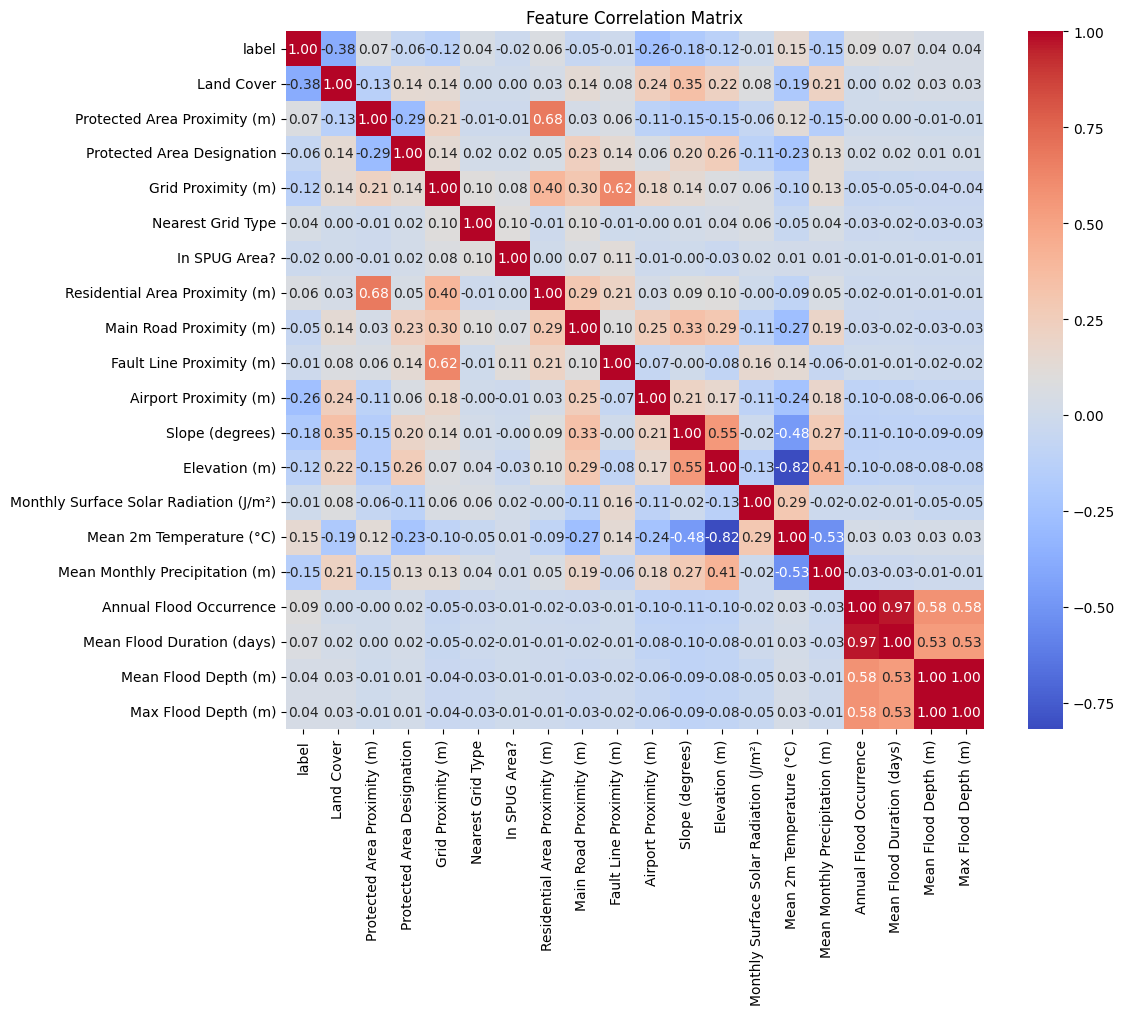

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only keep numeric columns for correlation check
numeric_cols = df_final.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

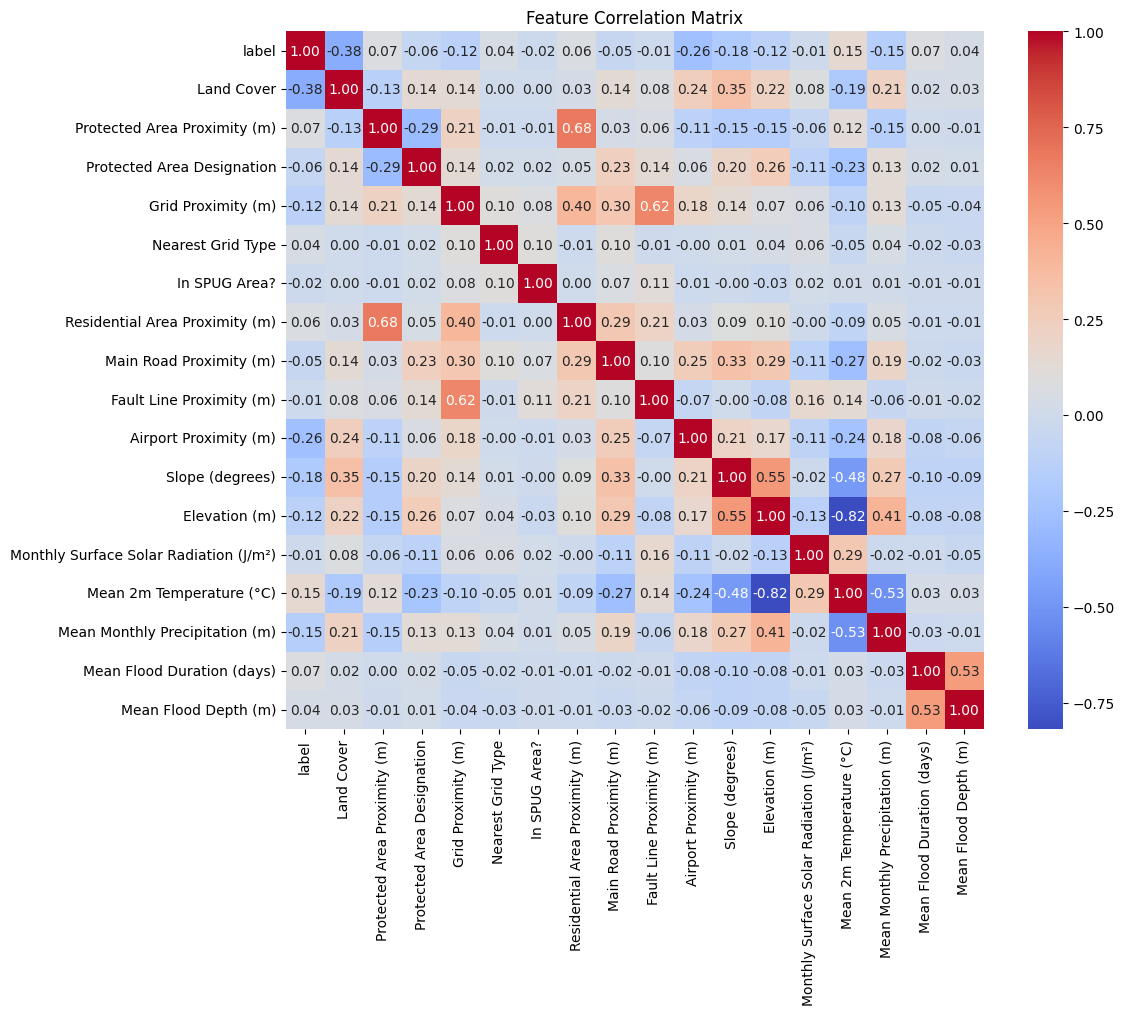

In [92]:
df_final_v2 = df_final.drop(columns=['Annual Flood Occurrence', 'Max Flood Depth (m)'])

# Only keep numeric columns for correlation check
numeric_cols = df_final_v2.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [93]:
# Show count of missing values per column
missing_counts = df_final_v2.isnull().sum()

# Filter to only show columns with at least one missing value
missing_counts = missing_counts[missing_counts > 0]

# Display result
print(missing_counts)


Series([], dtype: int64)


In [94]:
df_final_v2['Land Cover'].value_counts()

Land Cover
6    1514
2     241
3     240
1      85
7      28
4      19
0      13
8       5
5       2
Name: count, dtype: int64

In [95]:
df_final_v2

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,6,0.000000,5,46718.946358,2,0,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,6,570.009587,-1,11895.838867,2,0,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,1,7715.920807,-1,5.522954,1,0,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,1,10033.952651,-1,790.331571,2,0,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,1,10341.306087,-1,887.206652,0,0,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,3,18334.493248,-1,39566.694842,2,0,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,2,2886.701518,-1,15154.739824,0,0,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,6,0.000000,5,50747.388167,0,0,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,6,0.000000,5,184.426570,0,0,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [96]:
df_final_v2.to_csv("../00_data/pv_final_features_for_ML_v2.csv", index=False)

# Model Training

In [2]:
import pandas as pd

df = pd.read_csv("../00_data/pv_final_features_for_ML_v2.csv")
df

,label,Land Cover,Protected Area Proximity (m),Protected Area Designation,Grid Proximity (m),Nearest Grid Type,In SPUG Area?,Residential Area Proximity (m),Main Road Proximity (m),Fault Line Proximity (m),Airport Proximity (m),Slope (degrees),Elevation (m),Monthly Surface Solar Radiation (J/m²),Mean 2m Temperature (°C),Mean Monthly Precipitation (m),Mean Flood Duration (days),Mean Flood Depth (m)
0,1,6,0.000000,5,46718.946358,2,0,38197.134799,42654.723430,89208.689449,63512.347025,1,8,5.572055e+08,24.629277,0.213768,0.000000,0
1,1,6,570.009587,-1,11895.838867,2,0,7510.515472,58.027577,47254.328244,29240.303800,11,65,6.039935e+08,26.958410,0.178895,0.000000,0
2,1,1,7715.920807,-1,5.522954,1,0,0.000000,12.403919,29411.203523,1309.354101,2,24,5.488331e+08,26.598375,0.153467,0.000000,0
3,1,1,10033.952651,-1,790.331571,2,0,15.923985,170.472300,8332.244091,2046.144229,5,4,5.478269e+08,26.007129,0.143056,0.052632,0
4,1,1,10341.306087,-1,887.206652,0,0,4284.849524,8.161210,11298.036355,6970.687907,3,24,5.353490e+08,25.601383,0.204691,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0,3,18334.493248,-1,39566.694842,2,0,828.880218,128.704572,31631.244445,34807.037328,12,815,5.772190e+08,21.384464,0.365727,0.000000,0
2143,0,2,2886.701518,-1,15154.739824,0,0,2847.945242,568.878002,28142.667968,40709.680095,4,16,5.459523e+08,24.984362,0.260114,0.000000,0
2144,0,6,0.000000,5,50747.388167,0,0,7274.153177,6011.995652,7539.887300,58237.054380,32,2054,5.279392e+08,18.241925,0.221184,0.000000,0
2145,0,6,0.000000,5,184.426570,0,0,3192.157380,3800.290509,8269.197742,18195.136198,14,68,5.686114e+08,25.365436,0.243905,0.000000,0


In [3]:
df.label.value_counts()

label
0    2000
1     147
Name: count, dtype: int64

In [32]:
def fit_PU_estimator(X,y, hold_out_ratio, estimator):
    
    # find the indices of the positive/labeled elements
    assert (type(y) == np.ndarray), "Must pass np.ndarray rather than list as y"
    positives = np.where(y == 1.)[0] 
    # hold_out_size = the *number* of positives/labeled samples 
    # that we will use later to estimate P(s=1|y=1)
    hold_out_size = int(np.ceil(len(positives) * hold_out_ratio))
    np.random.shuffle(positives)
    # hold_out = the *indices* of the positive elements 
    # that we will later use  to estimate P(s=1|y=1)
    hold_out = positives[:hold_out_size] 
    # the actual positive *elements* that we will keep aside
    X_hold_out = X[hold_out] 
    # remove the held out elements from X and y
    X = np.delete(X, hold_out,0) 
    y = np.delete(y, hold_out)
    # We fit the estimator on the unlabeled samples + (part of the) positive and labeled ones.
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X, y)
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)
    #take the probability that it is 1
    hold_out_predictions = hold_out_predictions[:,1]
    # save the mean probability 
    c = np.mean(hold_out_predictions)
    return estimator, c

def predict_PU_prob(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)
    predicted_s = predicted_s[:,1]
    return predicted_s / prob_s1y1

In [29]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 


In [33]:
import xgboost as xgb

x_data = df.iloc[:,1:].values # just the X 
y_labeled = df.iloc[:,0].values # P & U class

predicted = np.zeros(len(x_data))
learning_iterations = 100
for index in range(learning_iterations):
    pu_estimator, probs1y1 = fit_PU_estimator(x_data, y_labeled, 0.2, xgb.XGBClassifier())
    predicted += predict_PU_prob(x_data, pu_estimator, probs1y1)
    if(index%4 == 0): 
        print(f'Learning Iteration::{index}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,2)}')

Learning Iteration::0/100 => P(s=1|y=1)=0.4099999964237213
Learning Iteration::4/100 => P(s=1|y=1)=0.4300000071525574
Learning Iteration::8/100 => P(s=1|y=1)=0.5299999713897705
Learning Iteration::12/100 => P(s=1|y=1)=0.38999998569488525
Learning Iteration::16/100 => P(s=1|y=1)=0.4699999988079071
Learning Iteration::20/100 => P(s=1|y=1)=0.44999998807907104
Learning Iteration::24/100 => P(s=1|y=1)=0.5099999904632568
Learning Iteration::28/100 => P(s=1|y=1)=0.6100000143051147
Learning Iteration::32/100 => P(s=1|y=1)=0.4000000059604645
Learning Iteration::36/100 => P(s=1|y=1)=0.41999998688697815
Learning Iteration::40/100 => P(s=1|y=1)=0.6000000238418579
Learning Iteration::44/100 => P(s=1|y=1)=0.3700000047683716
Learning Iteration::48/100 => P(s=1|y=1)=0.4300000071525574
Learning Iteration::52/100 => P(s=1|y=1)=0.3199999928474426
Learning Iteration::56/100 => P(s=1|y=1)=0.44999998807907104
Learning Iteration::60/100 => P(s=1|y=1)=0.4000000059604645
Learning Iteration::64/100 => P(s=1|y=1

In [ ]:
y_predict = [1 if x > 0.5 else 0 for x in (predicted/learning_iterations)]
evaluate_results(y_labeled, y_predict)

## Identifying reliable positives and negatives

In [99]:
X_train = df.iloc[:,1:].values # just the X
y_train = df.iloc[:,0].values # P & U class

X_positive = X_train[y_train == 1]
X_unlabeled = X_train[y_train == 0]

In [100]:
df.label.value_counts()

label
0    2000
1     147
Name: count, dtype: int64

In [ ]:
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# import numpy as np

# # Train calibrated SVM (Platt scaling)
# base_svm = SVC(kernel='rbf', probability=False)
# clf = CalibratedClassifierCV(base_svm, method='sigmoid', cv=5)
# clf.fit(X_train, y_train)

# # Get probabilities for all samples
# probs_positive = clf.predict_proba(X_positive)    # P(Y|X) for labeled positives
# probs_unlabeled = clf.predict_proba(X_unlabeled)   # P(Y|X) for unlabeled

# prob_gap_positive = probs_positive[:, 1] - probs_positive[:, 0]
# prob_gap_unlabeled = probs_unlabeled[:, 1] - probs_unlabeled[:, 0]

# # Step 1: get smallest prob from labeled positives (safety margin optional)
# min_prob_pos = prob_gap_positive.min()
# print(f"Minimum P(Y=1|X) among positives: {min_prob_pos:.4f}")

# # Step 2: identify reliable negatives in the unlabeled set
# reliable_negatives_mask = prob_gap_unlabeled < min_prob_pos
# reliable_negatives = X_unlabeled[reliable_negatives_mask]

# # Optional: also identify reliable positives from high-confidence scores
# reliable_positives_mask = prob_gap_unlabeled > 0
# reliable_positives = X_unlabeled[reliable_positives_mask]

# print(f"# Reliable negatives: {len(reliable_negatives)}")
# print(f"# Reliable positives: {len(reliable_positives)}")


Minimum P(Y=1|X) among positives: -0.9425
# Reliable negatives: 268
# Reliable positives: 0


In [ ]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# from sklearn.model_selection import train_test_split

# X_train = df.iloc[:,1:].values # just the X
# y_train = df.iloc[:,0].values # P & U class

# X_pos = X_train[y_train == 1]   # 147 labeled positives
# X_unl = X_train[y_train == 0]      # 2000 unlabeled (mix of pos/neg)

# X = np.vstack((X_pos, X_unl))
# s = y_train  # s=1 if labeled (positive), s=0 if unlabeled

# # --- Step 1: Train classifier to predict P(s=1|x) ---
# X_train, X_val, s_train, s_val = train_test_split(X, s, stratify=s, test_size=0.2, random_state=42)

# # Use calibrated SVM to get probability outputs
# base_svm = SVC(kernel='rbf', class_weight='balanced')
# clf = CalibratedClassifierCV(base_svm, method='sigmoid', cv=3)
# clf.fit(X_train, s_train)

# # --- Step 2: Estimate c = P(s=1 | y=1) from the labeled positives ---
# # Apply model to labeled positives in validation set
# X_pos_val = X_val[s_val == 1]
# p_s_given_x_pos = clf.predict_proba(X_pos_val)[:, 1]  # P(s=1 | x)
# c = np.mean(p_s_given_x_pos)
# print(f"Estimated c (P(s=1 | y=1)): {c:.4f}")

# # --- Step 3: Estimate P(y=1|x) for unlabeled samples ---
# X_unl_val = X_val[s_val == 0]
# p_s_given_x_unl = clf.predict_proba(X_unl_val)[:, 1]
# p_y_given_x = np.clip(p_s_given_x_unl / c, 0, 1)

# # --- Optional: Select reliable negatives ---
# # These are unlabeled points where P(y=1|x) is low
# threshold = 0.2  # or use np.percentile(p_y_given_x, 10)
# reliable_neg_mask = p_y_given_x < threshold
# reliable_neg = X_unl_val[reliable_neg_mask]
# print(f"# Reliable negatives found: {len(reliable_neg)}")

# # --- Bonus: Train final classifier with reliable negs and labeled pos ---
# X_final_train = np.vstack((X_pos, reliable_neg))
# y_final_train = np.array([1]*len(X_pos) + [0]*len(reliable_neg))

# final_clf = CalibratedClassifierCV(SVC(kernel='rbf', class_weight='balanced'), cv=3)
# final_clf.fit(X_final_train, y_final_train)


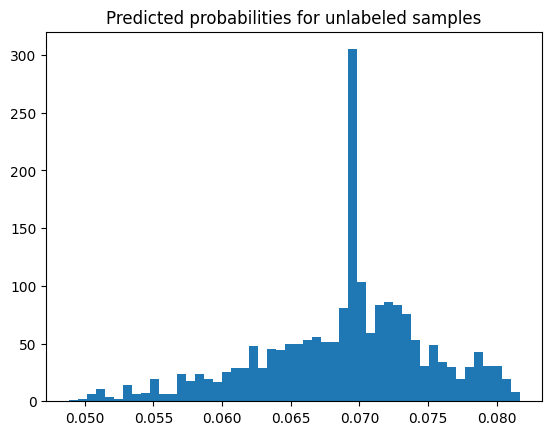

In [ ]:
# import matplotlib.pyplot as plt
# probs_unlabeled = clf.predict_proba(X_unlabeled)[:, 1]
# plt.hist(probs_unlabeled, bins=50)
# plt.title("Predicted probabilities for unlabeled samples")
# plt.show()


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb


# Split the data into training and testing sets
x_data = df.iloc[:,1:].values # just the X
y_data = df.iloc[:,0].values # P & U class
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

# Train a classifier to create a baseline
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Define a function to evaluate the results
def evaluate_results(y_test, y_predict):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0)) 

# Make predictions on the testing set and evaluate the results
y_predict = model.predict(x_test)
evaluate_results(y_test, y_predict)
# '''
# Classification results:
# f1: 99.57%
# roc: 99.57%
# recall: 99.15%
# precision: 100.00%
# '''

In [ ]:
# Create a copy of the data for PU learning
mod_data = df.copy()

# Extract the indices for the positive examples
index_pos = mod_data[mod_data['label']==1].sample(frac=0.25).index

# Create a new column as PU_Target
mod_data['PU_Target'] = "Unlabeled"

# Label only 25% of the positive examples as Positive (Rest remains as Unlabeled)
mod_data.loc[index_pos,'PU_Target'] = 'Positive'

# Print the cross-tabulation of the Target and PU_Target columns
print(pd.crosstab(mod_data['label'],mod_data['PU_Target'], margins=1))
'''
# Our purpose is to identify the 110 from 2110
'''

PU_Target  Positive  Unlabeled   All
label                               
0                 0       2000  2000
1                37        110   147
All              37       2110  2147


'\n# Our purpose is to identify the 458 from 1220\n'

In [ ]:
features = df.columns[1:]  # Exclude the label column

# Define a function to fit a PU estimator
def fit_PU_estimator_AM(X,y, hold_out_ratio, estimator):
    
    # Extract the positive elements that we will keep aside
    X_labled_pos = X[y==1]
    X_hold_out   = X_labled_pos.sample(frac=hold_out_ratio)
    
    # Extract the indices of the non-held out elements
    idx_non_hold = list(set(X.index)-set(X_hold_out.index))
    
    # Remove the held out elements from X and y
    X_non_hold = X.loc[idx_non_hold] 
    y_non_hold = y.loc[idx_non_hold]
    
    # Fit the estimator on the unlabeled samples and part of the positive labeled ones
    # In order to estimate P(s=1|X) or  what is the probablity that an element is *labeled*
    estimator.fit(X_non_hold, y_non_hold)
    
    # We then use the estimator for prediction of the positive held-out set 
    # in order to estimate P(s=1|y=1)
    hold_out_predictions = estimator.predict_proba(X_hold_out)[:,1]
    
    # save the mean probability 
    prob_s1y1 = hold_out_predictions.mean()
    return estimator, prob_s1y1

def predict_PU_prob_AM(X, estimator, prob_s1y1):
    predicted_s = estimator.predict_proba(X)[:,1]
    return predicted_s / prob_s1y1

# test the PU estimation approach
report = []

predicted = np.zeros(len(x_data))
learning_iterations = 1001
for index in range(learning_iterations):
    # In each iteraion only hold-out sample is different, thus pu_estimator & probs1y1 is different
    pu_estimator, probs1y1 = fit_PU_estimator_AM(X = mod_data[features], 
                                                 y = mod_data['PU_Target'].map({'Unlabeled':0,'Positive':1}).astype('int'),
                                                 hold_out_ratio = 0.25, 
                                                 estimator = xgb.XGBClassifier())
    predicted_index = predict_PU_prob_AM(mod_data[features], pu_estimator, probs1y1)
#**** predicted_s, probs1y1 being an 'uncalibrated' model output i.e. not a true probability, (predicted_s/probs1y1) is not ensured to remain within [0,1]
# For us, comparison is good-enough. Thus moving ahead with rescaling.
# Calibrated output would give better result.
    predicted_index_scaled = MinMaxScaler().fit_transform(predicted_index.reshape(-1,1)).reshape(-1)
    predicted += predicted_index_scaled
    
    if(index%100 == 0): 
        print(f'Learning Iteration::{index}/{learning_iterations} => P(s=1|y=1)={round(probs1y1,2)}')

# In every iteraion, the learnt classifier-(1) (estimator) is different & so is the P(s=1|y=1)
# '''
# Learning Iteration::0/1001 => P(s=1|y=1)=0.23000000417232513
# Learning Iteration::100/1001 => P(s=1|y=1)=0.20000000298023224
# Learning Iteration::200/1001 => P(s=1|y=1)=0.1599999964237213
# Learning Iteration::300/1001 => P(s=1|y=1)=0.20999999344348907
# Learning Iteration::400/1001 => P(s=1|y=1)=0.15000000596046448
# Learning Iteration::500/1001 => P(s=1|y=1)=0.17000000178813934
# Learning Iteration::600/1001 => P(s=1|y=1)=0.25999999046325684
# Learning Iteration::700/1001 => P(s=1|y=1)=0.15000000596046448
# Learning Iteration::800/1001 => P(s=1|y=1)=0.11999999731779099
# Learning Iteration::900/1001 => P(s=1|y=1)=0.17000000178813934
# Learning Iteration::1000/1001 => P(s=1|y=1)=0.18000000715255737
# '''

Learning Iteration::0/1001 => P(s=1|y=1)=0.12999999523162842


In [ ]:
# Taking avg of multiple iteraion
mod_data['y_pos_pred_proba'] = predicted/(index+1)

# Checking the final probability
pd.pivot_table(mod_data, index='Target', columns='PU_Target', values='y_pos_pred_proba', aggfunc='median')
# '''
# PU_Target Positive Unlabeled
# Target  
# 0 NaN 0.000349
# 1 0.65017 0.032135
# '''

In [ ]:
# For the masked pos-example model emits 100-times more probability than the masked-neg
report = []

# It's interesting to check the model performance at different thrshold
for thre in np.linspace(0.2,0.9,100):
#     print(thre)
    p = precision_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    r = recall_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    f = f1_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)
    a = accuracy_score(mod_data['Target'],mod_data['y_pos_pred_proba']>thre)

    report.append([thre, p,r,f,a])
    
report = pd.DataFrame(report, columns=['thre','P','R','F','A'])

import matplotlib.pyplot as plt
plt.plot(report['thre'],report['R'], label ='Recall')
plt.legend()
plt.show()